<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
B2.332-A1.Extracción Componentes Principales
</h1>


## Procedimiento

### Cargamos y/o instalamos las librerias necesarios

In [1]:
if(!require(devtools)){
    install.packages('devtools',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(devtools)
}
if(!require(ggbiplot)){
    install.packages('ggbiplot',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(ggbiplot)
}
if(!require(scales)){
    install.packages('scales',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(scales)
}
if(!require(grid)){
    install.packages('grid',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(grid)
}
if(!require(plyr)){
    install.packages('plyr',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(plyr)
}

Loading required package: devtools
Warning message:
"package 'devtools' was built under R version 3.3.3"Loading required package: ggbiplot
Warning message:
"package 'ggbiplot' was built under R version 3.3.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: plyr
Loading required package: scales
Loading required package: grid


### Cargamos los datos de un directorio local.

In [2]:
Alumnos_usos_sociales <- read.csv("B2.332_Students.csv", comment.char="#")
# X contiene las variables que queremos trabajar
R <- Alumnos_usos_sociales[,c(31:34)]
head(R)

G1,G2,G3,Supera
0,11,11,Si
9,11,11,Si
12,13,12,Si
14,14,14,Si
11,13,13,Si
12,12,13,Si


### Cálculo de la Singular value decomposition y de los valores que lo caracterizan.

In [3]:
# Generamos SVD
R.order  <- R
R.svd <-svd(R.order[,c(1:3)])

# D, U y V
R.svd$d
head(R.svd$u)
R.svd$v

[1] 655.82564  51.34035  31.52625

-0.01951348,0.152524017,-0.130424010
-0.02731492,0.023673988,-0.024927705
-0.03256743,-0.004733866,-0.027527862
-0.03697091,-0.006311903,-0.001888831
-0.03259648,0.022772287,-0.025197538
-0.03258524,0.007779281,0.012433138


-0.5684875,-0.73502282,0.3695448
-0.5758616,0.03472334,-0.8168095
-0.5875418,0.67715267,0.4430112


###  Calculo de la varianza acumulada en el primer factor

In [4]:
sum(R.svd$d)
var=sum(R.svd$d[1])
var
var/sum(R.svd$d)

[1] 738.6922

[1] 655.8256

[1] 0.8878199

### Porcentaje de la varianza explicada por los svd generados

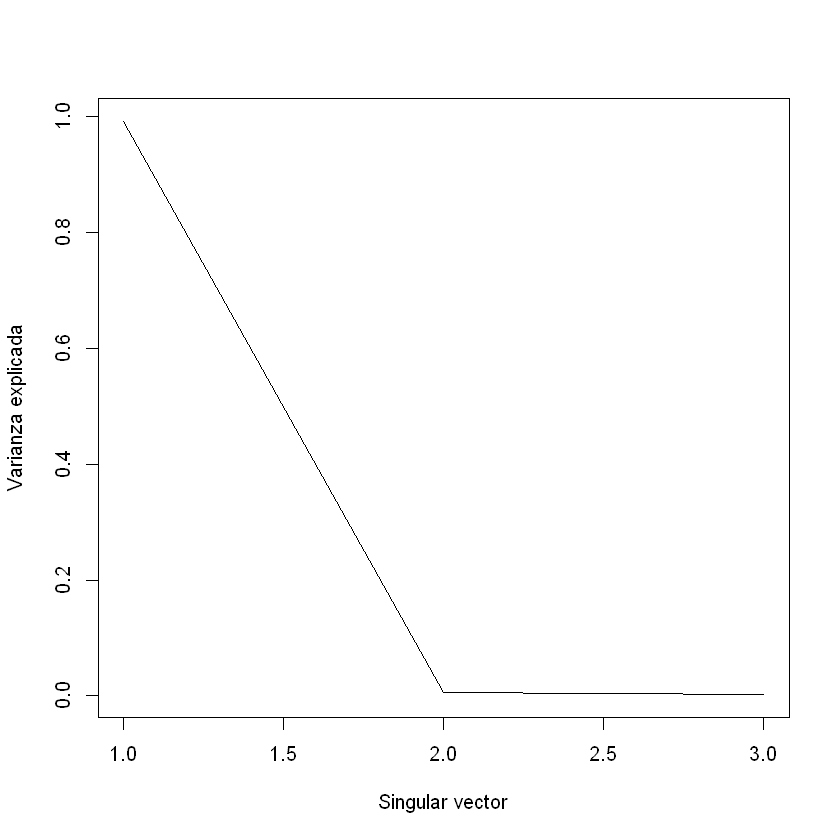

In [5]:
plot(R.svd$d^2/sum(R.svd$d^2),type="l",xlab="Singular vector",ylab="Varianza explicada")

### Porcentaje de la varianza acumulada explicada 

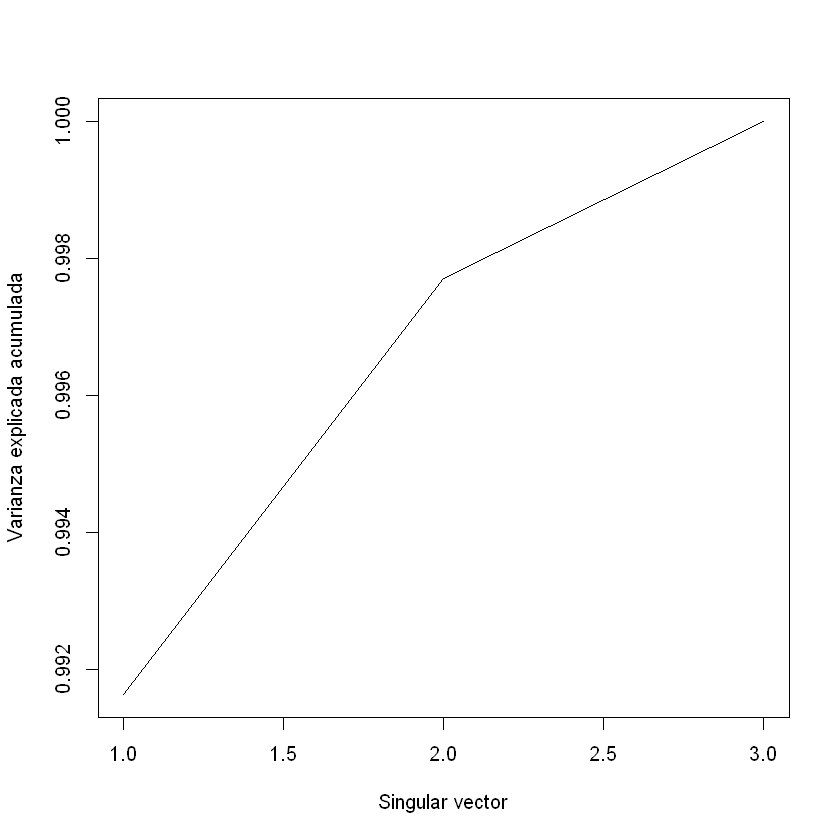

In [6]:
plot(cumsum(R.svd$d^2/sum(R.svd$d^2)),type="l",xlab="Singular vector",ylab="Varianza explicada acumulada")

### Creamos un gráfico con el primer y segundo vector asignando colores. Rojo no supera, verde supera

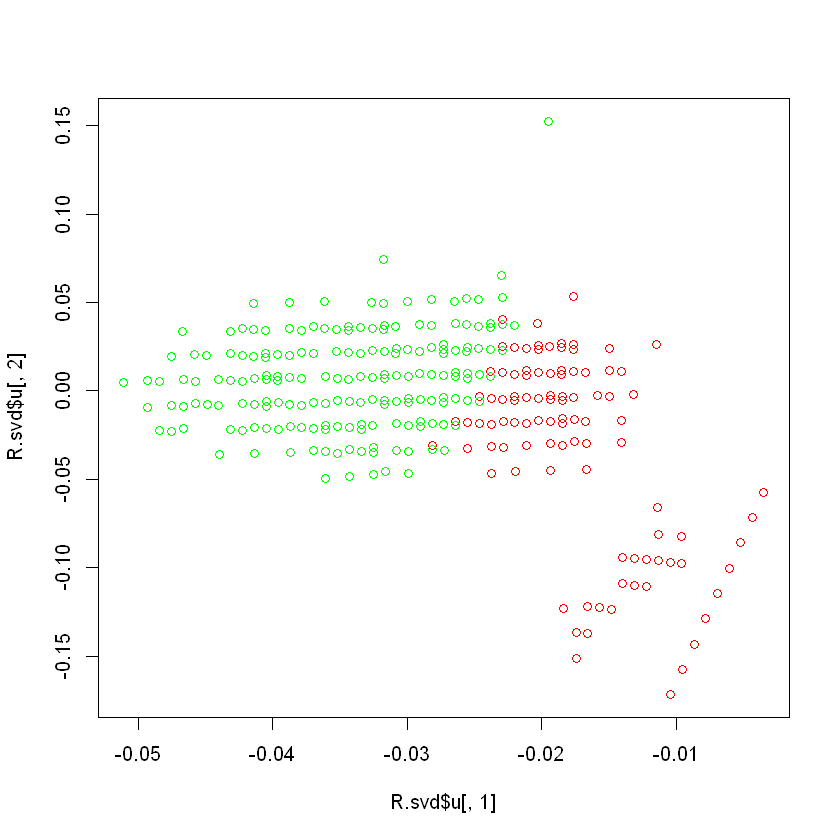

In [7]:
# Dibujamos primero todos los scores de comp2 y comp1
Y <- R.order[,4]
plot(R.svd$u[,1],R.svd$u[,2])
# Asignamos rojo a no supera y verde a si supera
points(R.svd$u[Y=="No",1],R.svd$u[Y=="No",2],col="red")
points(R.svd$u[Y=="Si",1],R.svd$u[Y=="Si",2],col="green")

### Reconstrucción de la imagen de los datos a partir de los SVD

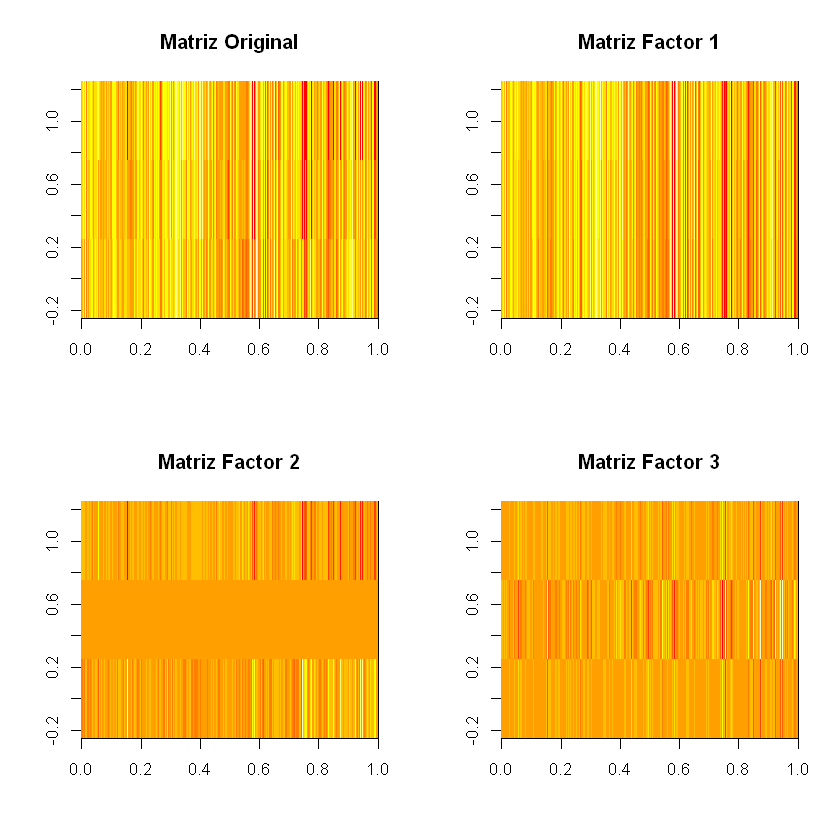

In [8]:
R.recon1=R.svd$u[,1]%*%diag(R.svd$d[1],length(1),length(1))%*%t(R.svd$v[,1])
R.recon2=R.svd$u[,2]%*%diag(R.svd$d[2],length(2),length(2))%*%t(R.svd$v[,2])
R.recon3=R.svd$u[,3]%*%diag(R.svd$d[3],length(3),length(3))%*%t(R.svd$v[,3])
par(mfrow=c(2,2))
image(as.matrix(R.order[,c(1:3)]),main="Matriz Original")
image(R.recon1,main="Matriz Factor 1")
image(R.recon2,main="Matriz Factor 2")
image(R.recon3,main="Matriz Factor 3")